In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
from tqdm import tqdm
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import SpectralClustering, AffinityPropagation
from sklearn.cluster import DBSCAN

#from sklearn.cluster import OPTICS
from sklearn.manifold import TSNE
import utils
plt.ion()
plt.show()

import matplotlib
import tools as t

from scipy.sparse import csr_matrix
from scipy import spatial
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse.csgraph import connected_components
from sklearn.metrics import pairwise_kernels
from networkx.algorithms.cuts import conductance
import networkx as nx 
import pickle
from scipy.stats import pearsonr
from scipy import spatial
sns.set_style('darkgrid')
%matplotlib inline

elbowAnalysis
silhouetteAnalyis


# DBSCAN Clustering:

The DBSCAN algorithm can be abstracted into the following steps:

1. Find the points in the ε (eps) neighborhood of every point, and identify the core points with more than minPts neighbors.
2. Find the connected components of core points on the neighbor graph, ignoring all non-core points.
3. Assign each non-core point to a nearby cluster if the cluster is an ε (eps) neighbor, otherwise assign it to noise.

_Advantages_
1. Fast, works with large databases
2. Can handles noisy points
3. Can find clusters of arbitrary shapes 
4. Can find number of clusters given eps

In [4]:

epoch_subsample = np.unique(np.round(np.logspace(np.log10(1), np.log10(9999), num=100, endpoint=True)).astype(int))
data_tishby = np.load('/home/zz452/cluster/data/modelTishby_0_layer_data.p')


def get_nclusters(epsilon = 0.1, lndx = -2):
    layer = data_tishby[lndx] 

    nb_clusters = []
    for idx in range(len(layer)):

        X = layer[idx,:,:]
        clustering = DBSCAN(eps = epsilon, min_samples=1).fit(X)
        y_pred = clustering.labels_
        cluster_labels = np.unique(y_pred)


        if -1 in cluster_labels:
            nclusters = len(cluster_labels)-1
        else:
            nclusters = len(cluster_labels)
        nb_clusters.append(nclusters)
        print(nclusters)
        print(np.count_nonzero(y_pred!=-1))
    return nb_clusters


In [5]:
def get_binned_MI(binsize, lndx = -2):
    layer = data_tishby[lndx] 
    
    def get_unique_probs(x):
        uniqueids = np.ascontiguousarray(x).view(np.dtype((np.void, x.dtype.itemsize * x.shape[1])))
        _, unique_inverse, unique_counts = np.unique(uniqueids, return_index=False, return_inverse=True, return_counts=True)
        return np.asarray(unique_counts / float(sum(unique_counts))), unique_inverse


    def bin_calc_information2(layerdata, binsize):
        # This is even further simplified, where we use np.floor instead of digitize
        def get_h(d):
            digitized = np.floor(d / binsize).astype('int')
            p_ts, _ = get_unique_probs( digitized )
            return -np.sum(p_ts * np.log(p_ts))

        H_LAYER = get_h(layerdata)
        return H_LAYER

    binxm = np.zeros(len(layer))
    for idx in range(len(layer)):
        binxm[idx] = bin_calc_information2(layer[idx,:,:], binsize)
    return binxm

_Layer 5 (Dims: 3)_

In [6]:
points = data_tishby[-2][0,:,:]
M_d = spatial.distance_matrix(points,
                              points,
                              p=2)**2


(0.0025596002242259663, 0.0011386118303974844)

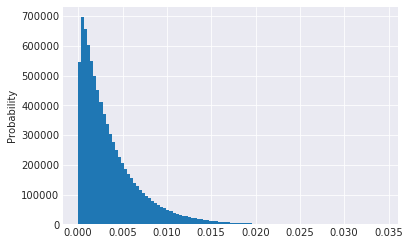

In [11]:
dists = M_d[np.tril_indices(points.shape[0], k = -1)]
%matplotlib inline
plt.hist(dists,  bins=100)
plt.ylabel('Probability');
np.median(dists), np.quantile(dists, 0.25)

3924
4096
3974
4096
3948
4096
3996
4096
3991
4096
4018
4096
4025
4096
4039
4096
4055
4096
4075
4096
4073
4096
4078
4096
4079
4096
4083
4096
4089
4096
4085
4096
4086
4096
4082
4096
4089
4096
4038
4096
3819
4096
3399
4096
3031
4096
2664
4096
2532
4096
2471
4096
2384
4096
2323
4096
2268
4096
2161
4096
2128
4096
2098
4096
2045
4096
2048
4096
2076
4096
2120
4096
2202
4096
2229
4096
2346
4096
2412
4096
2481
4096
2536
4096
2680
4096
2834
4096
3031
4096
3197
4096
3289
4096
3350
4096
3284
4096
3123
4096
2890
4096
2643
4096
2305
4096
1985
4096
1850
4096
1740
4096
1647
4096
1594
4096
1502
4096
1432
4096
1350
4096
1238
4096
1088
4096
1002
4096
892
4096
873
4096
846
4096
825
4096
805
4096
779
4096
771
4096
759
4096
740
4096
733
4096
669
4096
705
4096
678
4096
670
4096
648
4096
656
4096
650
4096
603
4096
573
4096
572
4096
3385
4096
3555
4096
3545
4096
3620
4096
3630
4096
3752
4096
3792
4096
3839
4096
3899
4096
3964
4096
3989
4096
4021
4096
4015
4096
4032
4096
4057
4096
4049
4096
4062
4096
4057
4096


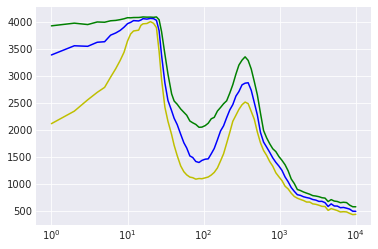

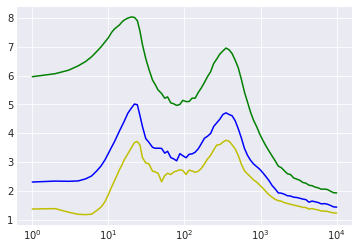

In [41]:
nclusters1 = get_nclusters(epsilon = 0.0012)   #eps = 0.03 (max dist),  4(min_samples)
nclusters2 = get_nclusters(epsilon = 0.002)
nclusters3 = get_nclusters(epsilon = 0.003)

binned_mi1 = get_binned_MI(binsize = 0.01)
binned_mi2 = get_binned_MI(binsize = 0.05)
binned_mi3 = get_binned_MI(binsize = 0.1)
fig = plt.figure()
plt.semilogx(epoch_subsample, nclusters1, 'g')
plt.semilogx(epoch_subsample, nclusters2, 'b')
plt.semilogx(epoch_subsample, nclusters3, 'y')
plt.figure()
plt.semilogx(epoch_subsample, binned_mi1, 'g')
plt.semilogx(epoch_subsample, binned_mi2, 'b')
plt.semilogx(epoch_subsample, binned_mi3, 'y')
print('Correlation between binned MI and number of clusters: ', pearsonr(nclusters, binned_mi2))

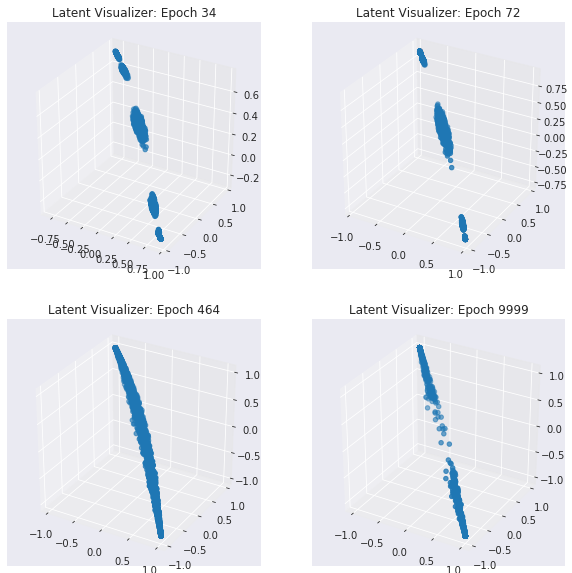

In [42]:
layer = data_tishby[-2]
activity = layer[22,:,:]
#fig, ax = plt.subplots(211)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(activity[:,0],
           activity[:,1], 
           activity[:,2])
ax.title.set_text('Latent Visualizer: Epoch ' + str(epoch_subsample[22]))

activity = layer[30,:,:]
#fig2 = plt.figure(figsize=(5,5))
ax = fig.add_subplot(222, projection='3d')
ax.scatter(activity[:,0],
           activity[:,1], 
           activity[:,2])
ax.title.set_text('Latent Visualizer: Epoch '+ str(epoch_subsample[30]))

activity = layer[50,:,:]
#fig2 = plt.figure(figsize=(5,5))
ax = fig.add_subplot(223, projection='3d')
ax.scatter(activity[:,0],
           activity[:,1], 
           activity[:,2])
ax.title.set_text('Latent Visualizer: Epoch '+ str(epoch_subsample[50]))

activity = layer[83,:,:]
#fig3 = plt.figure(figsize=(5,5))
ax = fig.add_subplot(224, projection='3d')
ax.scatter(activity[:,0],
           activity[:,1], 
           activity[:,2])
ax.title.set_text('Latent Visualizer: Epoch '+ str(epoch_subsample[83]))


_Layer 4 (Dims: 4)_

In [ ]:
#Heuristic for  epsilon 

# points = data_tishby[-3][0,:,:]
# M_d = spatial.distance_matrix(points,
#                               points,
#                               p=2)**2
# np.median(M_d[np.tril_indices(points.shape[0], k = -1)])

In [43]:
points = data_tishby[-3][0,:,:]
M_d = spatial.distance_matrix(points,
                              points,
                              p=2)**2

(0.014655863527732432, 0.00694174922604507)

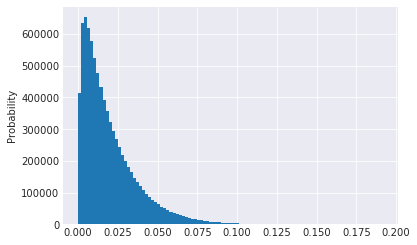

In [44]:
dists = M_d[np.tril_indices(points.shape[0], k = -1)]
%matplotlib inline
plt.hist(dists,  bins=100)
plt.ylabel('Probability');
np.median(dists), np.quantile(dists, 0.25)

4090
4096
4092
4096
4092
4096
4095
4096
4092
4096
4094
4096
4096
4096
4095
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4096
4095
4096
4095
4096
4079
4096
4031
4096
3926
4096
3808
4096
3686
4096
3601
4096
3502
4096
3443
4096
3434
4096
3395
4096
3370
4096
3404
4096
3400
4096
3399
4096
3435
4096
3471
4096
3521
4096
3585
4096
3678
4096
3774
4096
3851
4096
3945
4096
3999
4096
4042
4096
4067
4096
4080
4096
4086
4096
4090
4096
4093
4096
4091
4096
4093
4096
4091
4096
4088
4096
4081
4096
4067
4096
4053
4096
4031
4096
4019
4096
3995
4096
3981
4096
3934
4096
3909
4096
3860
4096
3841
4096
3806
4096
3780
4096
3768
4096
3736
4096
3724
4096
3709
4096
3685
4096
3660
4096
3645
4096
3628
4096
3611
4096
3600
4096
3573
4096
3569
4096
3565
4096
3555
4096
3548
4096
3505
4096
3490
4096
3480
4096
3513
4096
3578
4096
3672
4096
3700
4096
3751
4096
3694
4096
3707
4096
3739
4096
3800
4096
3957
4096
4036
4096
4043
4096
4025
4096
4029
4096
4054
4096
4019
4096


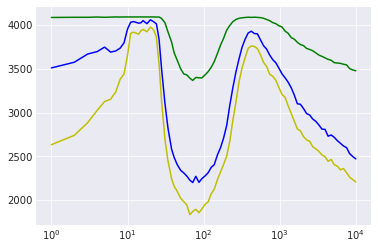

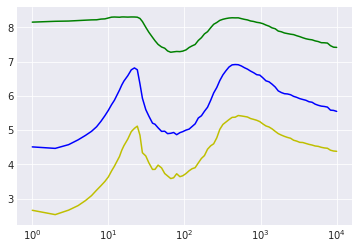

In [50]:
nclusters1 = get_nclusters(epsilon = 0.002, lndx = -3)   #eps = 0.03 (max dist),  4(min_samples)
nclusters2 = get_nclusters(epsilon = 0.007, lndx = -3)
nclusters3 = get_nclusters(epsilon = 0.009, lndx = -3)

binned_mi1 = get_binned_MI(binsize = 0.01, lndx = -3)
binned_mi2 = get_binned_MI(binsize = 0.05, lndx = -3)
binned_mi3 = get_binned_MI(binsize = 0.1, lndx = -3)
fig = plt.figure()
plt.semilogx(epoch_subsample, nclusters1, 'g')
plt.semilogx(epoch_subsample, nclusters2, 'b')
plt.semilogx(epoch_subsample, nclusters3, 'y')
plt.figure()
plt.semilogx(epoch_subsample, binned_mi1, 'g')
plt.semilogx(epoch_subsample, binned_mi2, 'b')
plt.semilogx(epoch_subsample, binned_mi3, 'y')
print('Correlation between binned MI and number of clusters: ', pearsonr(nclusters2, binned_mi2))

_Layer 3 (Dims = 5)_

In [51]:
points = data_tishby[-4][0,:,:]
M_d = spatial.distance_matrix(points,
                              points,
                              p=2)**2
np.mean(M_d[np.tril_indices(points.shape[0], k = -1)])

0.07785093084330759

0.02992559833543544

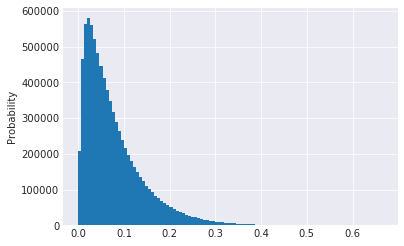

In [52]:
dists = M_d[np.tril_indices(points.shape[0], k = -1)]
%matplotlib inline
plt.hist(dists,  bins=100)
plt.ylabel('Probability');
np.quantile(dists, 0.25)

759
4096
746
4096
868
4096
1136
4096
1621
4096
1823
4096
2036
4096
2289
4096
2585
4096
2895
4096
3177
4096
3528
4096
3635
4096
3650
4096
3697
4096
3644
4096
3777
4096
3487
4096
3440
4096
3070
4096
2789
4096
2473
4096
2350
4096
2171
4096
2184
4096
2095
4096
1992
4096
2001
4096
2014
4096
1983
4096
2010
4096
2062
4096
2054
4096
2066
4096
2139
4096
2143
4096
2237
4096
2333
4096
2459
4096
2565
4096
2712
4096
2865
4096
3006
4096
3183
4096
3397
4096
3585
4096
3696
4096
3773
4096
3828
4096
3885
4096
3910
4096
3912
4096
3909
4096
3926
4096
3920
4096
3918
4096
3912
4096
3880
4096
3843
4096
3822
4096
3780
4096
3746
4096
3702
4096
3707
4096
3723
4096
3715
4096
3710
4096
3726
4096
3708
4096
3719
4096
3719
4096
3712
4096
3711
4096
3706
4096
3716
4096
3713
4096
3711
4096
3710
4096
3692
4096
3665
4096
3683
4096
3646
4096
3656
4096
3647
4096
Correlation between binned MI and number of clusters:  (0.9604474696638806, 2.7009136841397477e-47)


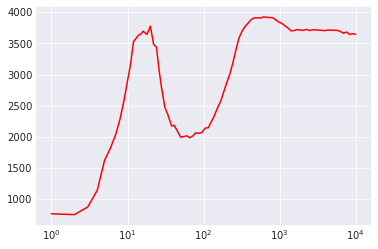

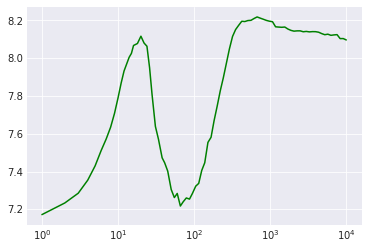

In [25]:
nclusters = get_nclusters(epsilon = 0.03, lndx = -4)   #eps = 0.03 (max dist),  4(min_samples)
binned_mi = get_binned_MI(binsize = 0.05, lndx = -4)
fig = plt.figure()
plt.semilogx(epoch_subsample, nclusters, 'r')
plt.figure()
plt.semilogx(epoch_subsample, binned_mi, 'g')
print('Correlation between binned MI and number of clusters: ', pearsonr(nclusters, binned_mi))

# Layer 2 (Dims 7)

In [32]:
points = data_tishby[-5][0,:,:]
M_d = spatial.distance_matrix(points,
                              points,
                              p=2)**2

0.14124471869591554

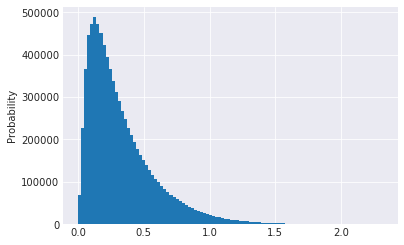

In [33]:
dists = M_d[np.tril_indices(points.shape[0], k = -1)]
%matplotlib inline
plt.hist(dists,  bins=100)
plt.ylabel('Probability');
np.quantile(dists, 0.25)

4081
4096
4087
4096
4092
4096
4093
4096
4096
4096
4096
4096
4096
4096
4094
4096
4092
4096
4088
4096
4083
4096
4080
4096
4094
4096
4092
4096
4090
4096
4089
4096
4076
4096
4038
4096
4076
4096
4077
4096
4055
4096
4043
4096
4032
4096
4029
4096
4026
4096
4029
4096
4031
4096
4042
4096
4039
4096
4049
4096
4051
4096
4065
4096
4066
4096
4072
4096
4074
4096
4082
4096
4088
4096
4090
4096
4089
4096
4074
4096
4067
4096
4064
4096
4088
4096
4096
4096
4096
4096
4096
4096
4096
4096
4095
4096
4094
4096
4095
4096
4096
4096
4095
4096
4096
4096
4095
4096
4096
4096
4092
4096
4083
4096
4078
4096
4072
4096
4068
4096
4069
4096
4071
4096
4079
4096
4081
4096
4084
4096
4085
4096
4086
4096
4087
4096
4087
4096
4086
4096
4086
4096
4085
4096
4083
4096
4083
4096
4084
4096
4083
4096
4082
4096
4082
4096
4082
4096
4081
4096
4082
4096
4080
4096
4078
4096
4079
4096
Correlation between binned MI and number of clusters:  (0.8862622384697937, 3.8594224009778873e-29)


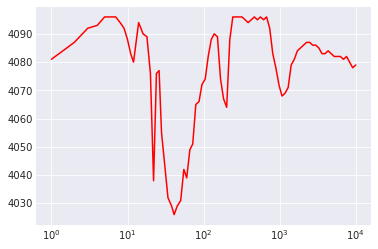

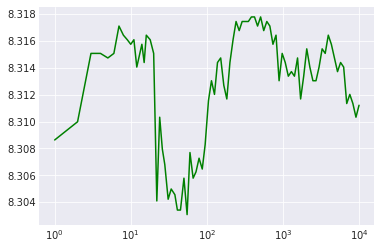

In [35]:
nclusters = get_nclusters(epsilon = 0.04, lndx = -5)   #eps = 0.03 (max dist),  4(min_samples)
binned_mi = get_binned_MI(binsize = 0.05, lndx = -5)
fig = plt.figure()
plt.semilogx(epoch_subsample, nclusters, 'r')
plt.figure()
plt.semilogx(epoch_subsample, binned_mi, 'g')
print('Correlation between binned MI and number of clusters: ', pearsonr(nclusters, binned_mi))

# MNIST

In [48]:
ARCH = '1024-20-20-20'
DIR_TEMPLATE = '%%s_%s'%ARCH
activation = 'tanh'
cur_dir = 'ibsgd/rawdata/' + DIR_TEMPLATE % activation

In [52]:
 ##lndx = -2, binsize = 0.07/0.1, eps = 0.3, min_samples = 20

def get_nclusters(epsilon = 0.32, min_samples = 1, lndx = -2):
    nb_clusters = []
    for epochfile in sorted(os.listdir(cur_dir)):
        fname = cur_dir + "/" + epochfile
        with open(fname, 'rb') as f:
                d = pickle.load(f)

        activity = d['data']['activity_tst'][lndx]
        #binned_mi = bin_calc_information2(activity, binsize)
        #binxm.append(binned_mi)

        clustering = DBSCAN(eps = epsilon, min_samples=min_samples).fit(activity)
        y_pred = clustering.labels_
        cluster_labels = np.unique(y_pred)


        if -1 in cluster_labels:
            nclusters = len(cluster_labels)-1
        else:
            nclusters = len(cluster_labels)
        nb_clusters.append(nclusters)
        print(nclusters)
        print(np.count_nonzero(y_pred!=-1))
    return nb_clusters

In [57]:
def get_binned_MI(binsize=0.1, lndx = -2):
    def get_unique_probs(x):
        uniqueids = np.ascontiguousarray(x).view(np.dtype((np.void, x.dtype.itemsize * x.shape[1])))
        _, unique_inverse, unique_counts = np.unique(uniqueids, return_index=False, return_inverse=True, return_counts=True)
        return np.asarray(unique_counts / float(sum(unique_counts))), unique_inverse


    def bin_calc_information2(layerdata, binsize):
        # This is even further simplified, where we use np.floor instead of digitize
        def get_h(d):
            digitized = np.floor(d / binsize).astype('int')
            p_ts, _ = get_unique_probs( digitized )
            return -np.sum(p_ts * np.log(p_ts))

        H_LAYER = get_h(layerdata)
        return H_LAYER
    binxm = []
    for epochfile in sorted(os.listdir(cur_dir)):
        fname = cur_dir + "/" + epochfile
        with open(fname, 'rb') as f:
                d = pickle.load(f)

        activity = d['data']['activity_tst'][lndx]
        binned_mi = bin_calc_information2(activity, binsize)
        binxm.append(binned_mi)
    return np.asarray(binxm)

9995
10000
9973
10000
9963
10000
9959
10000
9965
10000
9960
10000
9958
10000
9956
10000
9950
10000
9951
10000
9948
10000
9946
10000
9944
10000
9945
10000
9947
10000
9945
10000
9948
10000
9947
10000
9952
10000
9948
10000
9947
10000
9953
10000
9955
10000
9950
10000
9946
10000
9937
10000
9936
10000
9939
10000
9951
10000
9951
10000
9953
10000
9953
10000
9960
10000
9952
10000
9961
10000
9959
10000
9957
10000
9967
10000
9968
10000
9974
10000
9969
10000
9969
10000
9968
10000
9969
10000
9971
10000
9968
10000
9969
10000
9970
10000
9975
10000
9977
10000
9978
10000
9967
10000
9970
10000
9970
10000
9960
10000
9949
10000
9945
10000
9936
10000
9931
10000
9926
10000
9928
10000
9916
10000
9906
10000
9889
10000
9870
10000
9862
10000
9860
10000
9844
10000
9839
10000
9831
10000
9825
10000
9815
10000
9799
10000
9793
10000
9784
10000
9771
10000
9755
10000
9741
10000
9713
10000
9704
10000
9692
10000
9681
10000
9674
10000
9655
10000
9645
10000
9631
10000
9611
10000
9604
10000
9593
10000
9586
10000
9569
10000

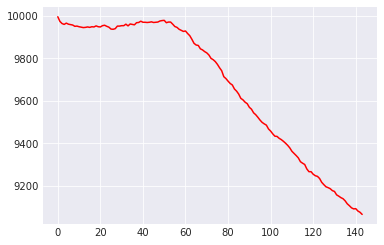

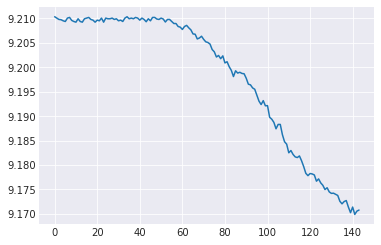

In [60]:
nclusters = get_nclusters(epsilon = 0.1, lndx = -2)   #eps = 0.03 (max dist),  4(min_samples)
binned_mi = get_binned_MI(binsize = 0.1, lndx = -2)
plt.figure()
plt.plot(nclusters, 'r')
plt.figure()
plt.plot(binned_mi)
print('Correlation between binned MI and number of clusters: ', pearsonr(nclusters, binned_mi))


In [ ]:
nclusters = get_nclusters(epsilon = 0.22, lndx = -2)   #eps = 0.03 (max dist),  4(min_samples)
binned_mi = get_binned_MI(binsize = 0.1, lndx = -2)
plt.figure()
plt.plot(nclusters, 'r')
plt.figure()
plt.plot(binned_mi)
print('Correlation between binned MI and number of clusters: ', pearsonr(nclusters, binned_mi))


In [ ]:
nclusters = get_nclusters(epsilon = 0.25, lndx = -2)   #eps = 0.03 (max dist),  4(min_samples)
binned_mi = get_binned_MI(binsize = 0.1, lndx = -2)
plt.figure()
plt.plot(nclusters, 'r')
plt.figure()
plt.plot(binned_mi)
print('Correlation between binned MI and number of clusters: ', pearsonr(nclusters, binned_mi))


In [ ]:
epochfiles = sorted(os.listdir(cur_dir))
fname = cur_dir + "/" + epochfiles[0]
with open(fname, 'rb') as f:
        d = pickle.load(f)
        epoch_no = d['epoch']
activity = d['data']['activity_tst'][lndx]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111) 
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(activity)
ax.scatter(tsne_results[:,0], tsne_results[:,1])
ax.title.set_text('Epoch '+ str(epoch_no))

In [ ]:
epochfiles = sorted(os.listdir(cur_dir))
fname = cur_dir + "/" + epochfiles[40]
with open(fname, 'rb') as f:
        d = pickle.load(f)
        epoch_no = d['epoch']
activity = d['data']['activity_tst'][lndx]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111) 
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(activity)
ax.scatter(tsne_results[:,0], tsne_results[:,1])
ax.title.set_text('Epoch '+ str(epoch_no))

In [ ]:
epochfiles = sorted(os.listdir(cur_dir))
fname = cur_dir + "/" + epochfiles[-1]
with open(fname, 'rb') as f:
        d = pickle.load(f)
        epoch_no = d['epoch']
activity = d['data']['activity_tst'][lndx]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111) 
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(activity)
ax.scatter(tsne_results[:,0], tsne_results[:,1])
ax.title.set_text('Epoch '+ str(epoch_no))

In [ ]:
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111) 
# ax.scatter(tsne_results[:,0][y_pred!=-1], tsne_results[:,1][y_pred!=-1], c = y_pred[y_pred!=-1])

In [ ]:
lndx = -3
epochfiles = sorted(os.listdir(cur_dir))
fname = cur_dir + "/" + epochfiles[-1]
with open(fname, 'rb') as f:
        d = pickle.load(f)

activity = d['data']['activity_tst'][lndx]
clustering = DBSCAN(eps=0.5, min_samples=20).fit(activity)
y_pred = clustering.labels_
cluster_labels = np.unique(y_pred)
if -1 in cluster_labels:
    nclusters = len(cluster_labels)-1
else:
    nclusters = len(cluster_labels)
print(nclusters)
print(np.count_nonzero(y_pred==-1)/len(y_pred))
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111) 
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(activity)
ax.scatter(tsne_results[:,0][y_pred!=-1], tsne_results[:,1][y_pred!=-1], c = y_pred[y_pred!=-1])
#ax.scatter(tsne_results[:,0][y_pred!=-1], tsne_results[:,1][y_pred!=-1], c = y_pred[y_pred!=-1])

# t-SNE based MI estimation on Tishby data

In [ ]:
binsize = 0.07

def get_unique_probs(x):
    uniqueids = np.ascontiguousarray(x).view(np.dtype((np.void, x.dtype.itemsize * x.shape[1])))
    _, unique_inverse, unique_counts = np.unique(uniqueids, return_index=False, return_inverse=True, return_counts=True)
    return np.asarray(unique_counts / float(sum(unique_counts))), unique_inverse


def bin_calc_information2(layerdata, binsize):
    # This is even further simplified, where we use np.floor instead of digitize
    def get_h(d):
        digitized = np.floor(d / binsize).astype('int')
        p_ts, _ = get_unique_probs( digitized )
        return -np.sum(p_ts * np.log(p_ts))

    H_LAYER = get_h(layerdata)
    return H_LAYER


In [ ]:
nb_clusters = []
lndx = -2

data_tishby = np.load('/home/zz452/cluster/data/modelTishby_0_layer_data.p')
layer = data_tishby[lndx] 
binxm_low = np.zeros(84)
binxm = np.zeros(84)
binsize_low = np.exp(1.5*np.log(binsize))
for idx in range(len(layer)):
    X = layer[idx,:,:]
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(X)
    binxm_low[idx] =  bin_calc_information2(tsne_results, binsize)
    binxm[idx] = bin_calc_information2(X, binsize)

In [ ]:
# binsize = 0.5
# binxm = np.zeros(84)
# for idx in range(len(layer)):
#     X = layer[idx,:,:]
#     binxm[idx] = bin_calc_information2(X, binsize)
# plt.plot(binxm)

In [ ]:
#plt.plot(binxm)
#plt.plot(binxm_low, 'r')

# Saxe Tishby Model with tanh

In [ ]:
ARCH = '10-7-5-4-3'
DIR_TEMPLATE = '%%s_%s'%ARCH
activation = 'tanh'
cur_dir = 'ibsgd/rawdata/' + DIR_TEMPLATE % activation

In [ ]:
lndx = -3  ##lndx = -2, binsize = 0.07/0.1, eps = 0.3, min_samples = 20
binxm = []
nb_clusters = []
binsize = 0.07
#scores = []
for epochfile in sorted(os.listdir(cur_dir)):
    fname = cur_dir + "/" + epochfile
    with open(fname, 'rb') as f:
            d = pickle.load(f)
            
    activity = d['data']['activity_tst'][lndx]
    binned_mi = bin_calc_information2(activity, binsize)
    binxm.append(binned_mi)
    
    clustering = DBSCAN(eps = 0.12, min_samples=10).fit(activity)
    y_pred = clustering.labels_
    cluster_labels = np.unique(y_pred)
    
    
    if -1 in cluster_labels:
        nclusters = len(cluster_labels)-1
    else:
        nclusters = len(cluster_labels)
    nb_clusters.append(nclusters)
    print(activity.shape, binned_mi, nclusters, np.count_nonzero(y_pred==-1)/len(y_pred))
    
print('Correlation between binned MI and no of clusters: ', pearsonr(nb_clusters, binxm))    

In [ ]:
plt.figure()
plt.plot(nb_clusters, 'r')
plt.figure()
plt.plot(binxm)

In [ ]:
epochfiles = sorted(os.listdir(cur_dir))
fname = cur_dir + "/" + epochfiles[160]
with open(fname, 'rb') as f:
        d = pickle.load(f)

activity = d['data']['activity_tst'][lndx]
clustering = DBSCAN(eps=0.1, min_samples=4).fit(activity)
y_pred = clustering.labels_
cluster_labels = np.unique(y_pred)
if -1 in cluster_labels:
    nclusters = len(cluster_labels)-1
else:
    nclusters = len(cluster_labels)
print(nclusters)
print(np.count_nonzero(y_pred==-1)/len(y_pred))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(activity[:,0][y_pred!=-1],
           activity[:,1][y_pred!=-1], 
           activity[:,2][y_pred!=-1], c = y_pred[y_pred!=-1])
ax.title.set_text('Latent Visualizer')


# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111) 
# tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# tsne_results = tsne.fit_transform(activity)
# ax.scatter(tsne_results[:,0][y_pred!=-1], tsne_results[:,1][y_pred!=-1], c = y_pred[y_pred!=-1])

# Saxe Tishby Model with ReLU

In [ ]:
# Correct binned MI for Tishby Model

In [ ]:
ARCH = '10-7-5-4-3'
DIR_TEMPLATE = '%%s_%s'%ARCH
activation = 'relu'
cur_dir = 'ibsgd/rawdata/' + DIR_TEMPLATE % activation

In [ ]:
lndx = -4  ##lndx = -2, binsize = 0.07/0.1, eps = 0.3, min_samples = 20
binxm = []
nb_clusters = []
binsize = 0.05
#scores = []
for epochfile in sorted(os.listdir(cur_dir)):
    fname = cur_dir + "/" + epochfile
    with open(fname, 'rb') as f:
            d = pickle.load(f)
            
    activity = d['data']['activity_tst'][lndx]
    binned_mi = bin_calc_information2(activity, binsize)
    binxm.append(binned_mi)
    
    clustering = DBSCAN(eps = 0.32, min_samples=10).fit(activity)
    y_pred = clustering.labels_
    cluster_labels = np.unique(y_pred)
    
    
    if -1 in cluster_labels:
        nclusters = len(cluster_labels)-1
    else:
        nclusters = len(cluster_labels)
    nb_clusters.append(nclusters)
    print(activity.shape, binned_mi, nclusters, np.count_nonzero(y_pred==-1)/len(y_pred))
    
print('Correlation between binned MI and no of clusters: ', pearsonr(nb_clusters, binxm))    

In [ ]:
plt.plot(nb_clusters, 'r')
plt.figure()
plt.plot(binxm)
print('Correlation between binned MI and no of clusters: ', pearsonr(nb_clusters[120:], binxm[120:]))    

In [ ]:
#epochfiles = sorted(os.listdir(cur_dir))
fname = cur_dir + "/" + epochfiles[0]
with open(fname, 'rb') as f:
        d = pickle.load(f)

activity = d['data']['activity_tst'][lndx]


clustering = DBSCAN(eps=0.3, min_samples=10).fit(activity)
y_pred = clustering.labels_
cluster_labels = np.unique(y_pred)
if -1 in cluster_labels:
    nclusters = len(cluster_labels)-1
else:
    nclusters = len(cluster_labels)
print(nclusters)
print(np.count_nonzero(y_pred==-1)/len(y_pred))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(activity[:,0],
           activity[:,1], 
           activity[:,2])
ax.title.set_text('Latent Visualizer')

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111) 
# tsne = TSNE(n_components=2, verbose=1, perplexity=300, n_iter=300)
# tsne_results = tsne.fit_transform(activity)
# ax.scatter(tsne_results[:,0], tsne_results[:,1], c = y_pred)